In [2]:
import numpy as np

### Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
model = LogisticRegression()

In [8]:
import pickle
result_final = pickle.load( open( "result_final.p", "rb" ) )
#X = np.random.rand(10000, 100)
#y = np.random.randint(0, high=10, size=(10000))

,title_id,title_names,texts,topic_index,topic_keywords,probability_score,title_names_with_highest_probability_score,probability_score_centroid
6745,0,first professional job for 20 year old,"hello Reddit,\nI recently just got my first pr...",37,"first,family,time,job,insurance,send,know,look...",0.336341,Tax advice for first time home buyers?,0.803333
2573,1,Question about automatic (scheduled) electroni...,I was reading [this blog post from Get Rich Sl...,6,"credit,score,card,question,choice,affect,hurt,...",0.338889,"Craigslist credit card fraud help,Does canceli...",0.803333
2889,2,Financial advice for a trust fund kid,I am just getting out of college and starting ...,8,"balance,transfer,reason,kid,follow,strategy,hi...",0.417148,Orders from amazon.com using my ink bold get c...,0.859524
2574,3,Withdraw less than standard deduction from 401...,"Here's the thing, I live in the UK now, and ha...",6,"credit,score,card,question,choice,affect,hurt,...",0.268706,"Craigslist credit card fraud help,Does canceli...",0.803333
1634,4,Congratulations fellow /r/pf'ers ... we were j...,,3,"fund,pay,second,need,advice,bond,mortgage,etf,...",0.338889,I'm trying to help people with their finances ...,0.877083
6666,5,$96k in student loans that keep getting sold f...,The title says it all. I'm a first generation...,36,"keep,deduction,share,stop,back,retirement,redu...",0.284061,Got a letter from a dealership offering to buy...,0.877083
3031,6,Any downside to keeping multiple credit cards?,So I mistakenly applied for a credit card whil...,10,"credit,card,reward,good,gift,price,close,trave...",0.380646,Trying to get cashback credit card,0.803333
1635,7,Several accounts in collections-does it matter...,I'm asking this on behalf of my boyfriend. He ...,3,"fund,pay,second,need,advice,bond,mortgage,etf,...",0.254167,I'm trying to help people with their finances ...,0.877083
1636,8,Match company's 401k then max out IRA then max...,I've seen this posted a couple times. Match yo...,3,"fund,pay,second,need,advice,bond,mortgage,etf,...",0.403333,I'm trying to help people with their finances ...,0.877083
2398,9,Where to find a private loan?,Long story short even with lowered interest ra...,5,"question,loan,refinance,auto,deposit,marry,age...",0.338889,private grad school loans vs. unsubsidized Sta...,0.836111


In [35]:
from sklearn.model_selection import train_test_split

##Assigning category codes to title names with highest probability score 
result_final_processed_1 = result_final.assign(title_id_highest_probability_score=(result_final['title_names_with_highest_probability_score']).astype('category').cat.codes)


In [49]:
##Creating a mapping table of 'title id with highest probability score' and 'title_names_with_highest_probability_score'
title_mapping_table = result_final_processed_1[['title_names_with_highest_probability_score','title_id_highest_probability_score']]
title_mapping_table=title_mapping_table.drop_duplicates().sort_values(by='title_id_highest_probability_score')
title_id_highest_probability_score

In [37]:
result_final_processed_2= result_final_processed_1[result_final_processed_1['texts']!='']

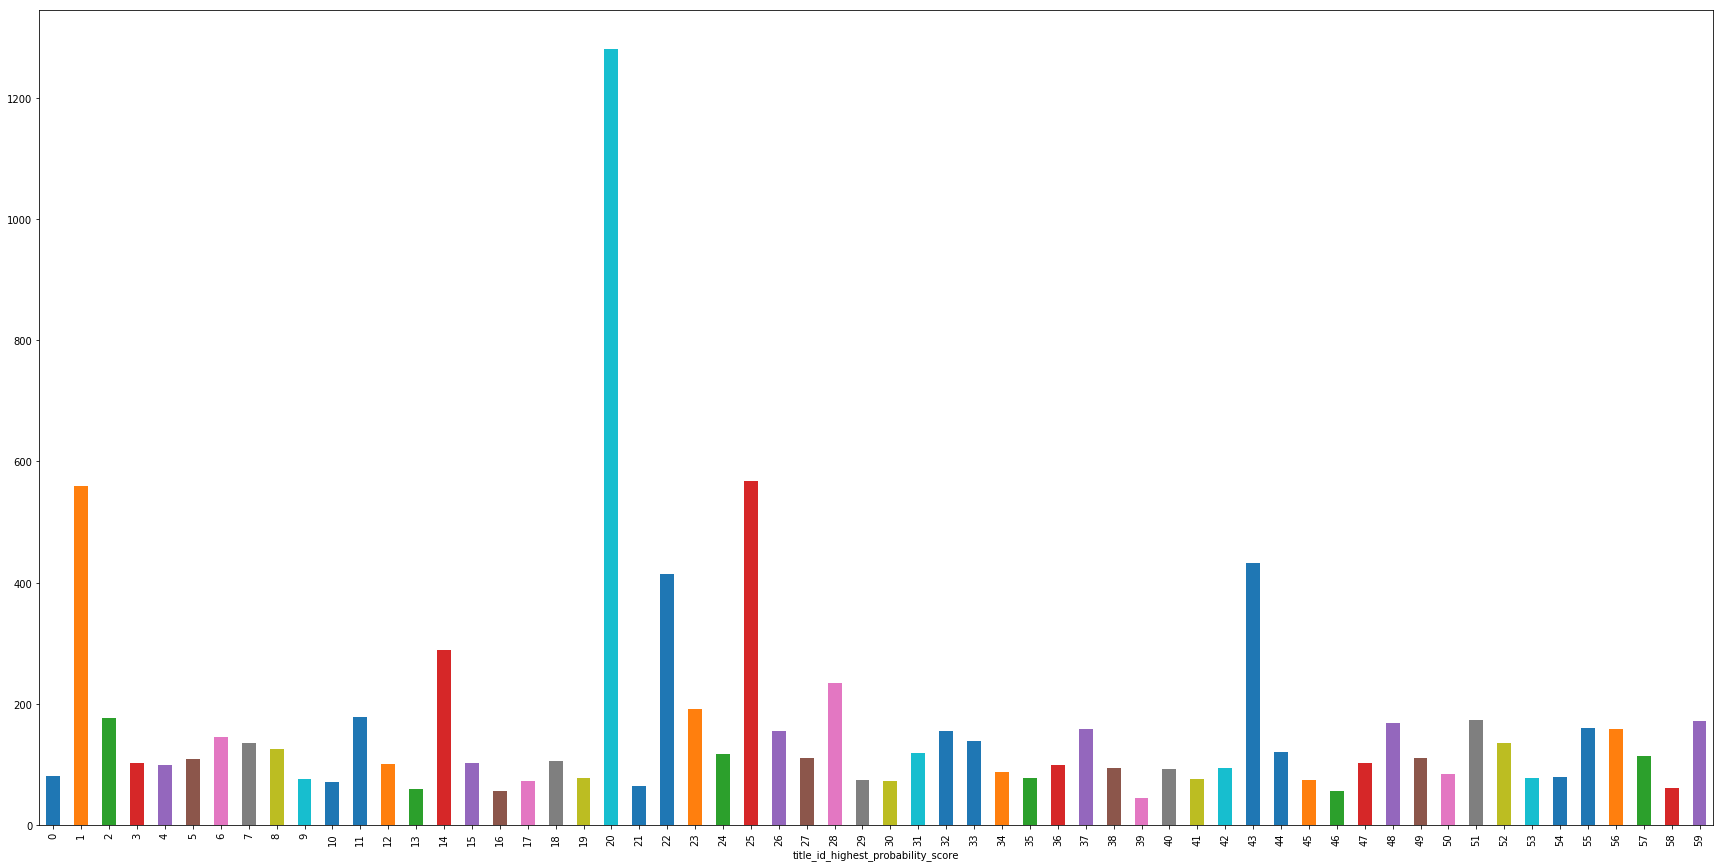

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,15))
result_final_processed_2.groupby('title_id_highest_probability_score').texts.count().plot.bar(ylim=0)
plt.show()

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(result_final_processed_2.texts).toarray()
labels = result_final_processed_2.title_id_highest_probability_score
features.shape

(9524, 24187)

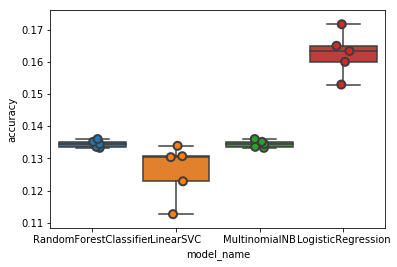

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [81]:
#model = LogisticRegression()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, result_final_processed_2.index, test_size=0.33, random_state=0)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test, y_pred)

In [82]:
title_mapping_table

,title_names_with_highest_probability_score,title_id_highest_probability_score
9916,"""Wells Fargo"" is trying to collect a debt over...",0
3111,(US) Verizon sent me to collections. I'm not ...,1
7412,20 year old looking for advice (CA),2
4094,24 y/o engineer w/ Roth IRA. Should I go tradi...,3
9001,Balancing work and leisure (should I take a PT...,4
9258,Best way to capitalize on ~$50K of tuition cos...,5
9107,Calculate Your Hourly Worth\nEver wonder if yo...,6
5687,"Can I afford to buy a new car? (US),I am upsid...",7
6081,Can someone solve my tax trouble riddles?,8
7042,Can we afford a new car?,9


### RNN Classifier

In [2]:
import tensorflow as tf
from collections import Counter
import multiprocessing
from multiprocessing import Pool
import re
from string import punctuation
import os

import models

In [3]:
def create_word_counter(texts, chunk_size=None, n_processes=multiprocessing.cpu_count()):
    if chunk_size == None:
        chunk_size = n_processes
    p = Pool(n_processes)
    word_counter = Counter()
    chunk = []
    ct = 0
    t0 = time.time()
    for document, summary in document_summary_pairs:
        combined_text = document.rstrip() + ' ' + summary.rstrip()
        chunk.append(combined_text)
        ct += 1
        if len(chunk) >= chunk_size:
            counters = p.map(count_words, chunk)
            word_counter += sum(counters, Counter())
            t_chunk = time.time() - t0
            t0 = time.time()
            chunk = []
            stdout.write('\rNumber of documents processed: {}; chunk time: {}'.format(ct, t_chunk))
            stdout.flush()
    if len(chunk) >= 0:
        counters = p.map(count_words, chunk)
        word_counter += sum(counters, Counter())
        t_chunk = time.time() - t0
        t0 = time.time()
        chunk = []
        stdout.write('\rNumber of documents processed: {}; chunk time: {}'.format(ct, t_chunk))
        stdout.flush()
    stdout.write('\n')
    return word_counter

def create_vocab_lookup(word_counter, max_vocab_size=None, special_tokens=None):
    if max_vocab_size == None:
        words = set(word_counter.keys())
    else:
        n_special = len(special_tokens) if special_tokens != None else 0
        words = sorted(word_counter, key=word_counter.get, reverse=True)[:max_vocab_size-n_special]
    words = special_tokens + words
    word2id = dict([(w, i) for i, w in enumerate(words)])
    return word2id

def remove_non_ascii(string):
    return re.sub(r'[^\x00-\x7f]', r'', string)

def clean_string(text, lower=True):
    text = remove_non_ascii(text)
    text = text.rstrip().replace("\n", " ").replace("\t", " ")
    text = text.replace("i.e.", "ie").replace("etc.", "etc").replace("e.g.", "eg") # replace common acronyms
    text = text + " " # add space at end to do period search
    text = text.replace(". ", " . ") # add spacing to periods
    text = re.sub("(\d)([a-zA-Z])", r"\1 \2", text) # seperate numbers and letters (e.g. 300mph -> 300 mph)
    for char in punctuation.replace(".", ""): # add spaces around punctuations
        text = text.replace('{}'.format(char), ' {} '.format(char))
    text = (text.replace("' s ", "'s ").replace("' ve ", "'ve ").replace("' re ", "'re ").replace("' t ", "'t ")
            .replace("' d ", "'d ").replace("' ll ", "'ll ").replace("' m ", "'m "))
    text = text.replace(" , 000", ",000") # rejoin numbers with commans (e.g. 600 , 000 -> 600,000)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    if lower == True:
        text = text.lower()
    return text

def tokenize(s):
    return s.split()

def pad_sentence(tokenized_sent, pad_len, go=None, eos=None):
    go = [] if go == None else [go]
    eos = [] if eos == None else [eos]
    
    tokenized_sent = go + tokenized_sent + eos
    real_len = len(tokenized_sent)
    
    if real_len < pad_len:
        tokenized_sent += ['PAD' for _ in range(pad_len - real_len)]
    elif real_len > pad_len:
        real_len = pad_len
        tokenized_sent = tokenized_sent[:pad_len-len(eos)] + eos
    else:
        pass
    return tokenized_sent, real_len

def convert_text_to_ids(text, word2id, pad_len, go=None, eos=None):
    clean_text = clean_string(text)
    tokenized_text = tokenize(clean_text)
    padded_text, real_len = pad_sentence(tokenized_text, pad_len, go=go, eos=eos)
    ids = []
    for word in padded_text:
        try:
            word_id = word2id[word]
        except:
            word_id = word2id['UNK']
        ids.append(word_id)
    return ids, real_len

In [4]:
gpu_device = 0
n_classes = 100
vocab_size = 50000
max_len = 100
embedding_dim = 100
hidden_size = 128
n_layers = 1

In [5]:
device_name = '/gpu:{}'.format(gpu_device)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "{}".format(gpu_device)

tf.reset_default_graph()
with tf.device(device_name):
    model = models.RNNAttnClassifier(n_classes, vocab_size, max_len, embedding_dim=embedding_dim, hidden_size=hidden_size, 
                                     n_layers=n_layers)